<center><h1>Titanic - Kaggle Competition</h1></center>

<p>This is an introduction to data science using an IPython notebook.  Here, I explore Kaggle's titanic dataset to create predictions for passenger survival based on a variety of data features.  Approximately 2,000 people set sail on the RMS Titanic's maiden voyage in April of 1912.  On April 12, the ship hit an iceberg in the North Atlantic ocean.  Here is what Wikipedia has to say on the matter:</p>
    
   <blockquote>Of the 2,224 passengers and crew aboard, more than 1,500 died in the sinking, making it one of the deadliest commercial peacetime maritime disasters in modern history.</blockquote>
   
<center><h2>The Competition</h2></center>

Kaggle is hosting this <a href="https://www.kaggle.com/c/titanic">introductory competition</a> to get people interested and involved in data science.  In this analysis, you will use a <b>training dataset</b> to build a model that can predict passenger survival based on various attributes.  Then you will apply the model to the <b>testing dataset</b> to predict the survival of the 417 passengers in that file.  Kaggle will then evaluate your predictions using the actual survival data of the test passengers.
 
<center><h2>The Dataset</h2></center><br/>
Our training dataset will have data for 891 passengers.  The dataset has the following features:

<ul>
 <li> <b>PassengerId</b>: The identifier of the passenger on the ship</li>
 <li> <b>Survived</b>: Whether or not the passenger survived (1 = survival)</li>
 <li> <b>Pclass</b>: The passenger's class (1st, 2nd or 3rd class). </li>
 <li> <b>Name</b>: The passenger's name, obviously.</li>
 <li> <b>Sex</b>: The gender of the passenger (male or female)</li>
 <li> <b>Age</b>: The age of the passenger in years.</li>
 <li> <b>SibSp</b>: How many siblings or spouses the passenger on board.</li>
 <li> <b>Parch</b>: The number of parents and children the passenger on board.</li>
 <li> <b>Ticket</b>: The ticket number for the passenger. I do not use this field.</li>
 <li> <b>Fare</b>: The fare paid by the passenger for the trip.</li>
 <li> <b>Cabin</b>: The cabin number of the passenger's room.  I do not use this field.</b>
 <li> <b>Embarked</b>: The embarkation point for the passenger ( C = Cherbourgh, Q = Queenstown, S = Southampton)</li>
 
</ul>

<p>The test dataset has all the same features, except for whether or not the passenger survived.  </p>

<br/><center><h2>The Process</h2></center><br/>

<p>In a data analysis project, there are several major steps you have to take: </p>

<ol>
    <li> Understanding the structure of your dataset</li>
    <li> Cleaning the dataset: missing values, outliers, breaking complex data into pieces</li>
    <li> Creating new data features out of the data</li>
    <li> Exploratory data analysis and visualization</li>
    <li> <b>Rinse and repeat the above steps until satisfied</b></li>
    <li> Build a predictive model</li>
    <li> Test your predictive model</li>
    <li> Optimize and choose your best model: Deciding what classifier to use, what features are important or helpful, how to optimize your classifier parameters</li>
    <li> <b>Rinse and repeat as satisfied/until you have to move onto something else</b></li>
</ol>

<p>This is an intentionally vague description, because it is a process you develop an intuition for after extended practice.  This is, after all, an introductory analysis, but should give you a clue about the major cycles that occur during the analysis process. </p>


<br/><center><h2>The Technology</h2></center><br/>
<p>I will be using an IPython3 notebook for this analysis, which is bundled with a variety of data science libraries.  The major ones are numpy, pandas, matplotlib and scikit-learn.  Numpy is used for number crunching, pandas for wrangling with datasets, matplotlib for visualizing data, and scikit-learn for building predictive models.</p>

<i><b>Now, let's take a look at some data!</b></i>

<h3>First Steps</h3>
<p>The first step is importing the libraries we need, and then reading in the data. We read in the data using the pandas <b><code>read_csv</code></b> function. We can see the first few rows of the dataset using the pandas <b><code>head</code></b> function. Or, you can see the columns of the dataset using the <b><code>columns</code></b> method of a DataFrame.</p>

In [1]:
# Standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import  csv
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(0) #staring random seed
from sklearn import linear_model

In [2]:
# read in the dataset
df = pd.read_csv('csvfiles/train.csv', header = 0)
test_df = pd.read_csv('csvfiles/test.csv', header = 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Randomly order the datasets in case we want to do cross validation (not to be explained here):

In [3]:
#shuffle utility function - randomly reorder the dataset
def shuffle(dframe, n = 1, axis = 0):
    dframe = dframe.copy()
    for x in range(n):
        dframe.apply(np.random.shuffle, axis = axis)
    return dframe

df = shuffle(df)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3>Basic Dataset Info</h3>

<p>We can see a high level overview of our dataset using the <b><code>info</code></b> function.  It can tell us if we have missing values in our data.  It indicates we have a significant number of missing values for <b>Age</b>, a lot of missing values for <b>Cabin</b>, and a few missing values for <b>Embarked.</b></p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


How many people survived?

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

So 549 died, 342 lived.  What is that, proprotionally?

In [7]:
df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

So 38% lived, 62% died.

<h3>Feature Exploration and Cleaning</h3>

We drop the <b>Ticket</b>, <b>Name</b> and <b>Cabin</b> columns from the data, I have decided not to use them in this analysis, for the sake of simplicity.

In [8]:
#Drop unused data
df = df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)


# I forgot to drop the name column
df = df.drop('Name', axis  = 1)
test_df = test_df.drop('Name', axis = 1)



We know we are missing some data from the <b>Embarked</b> and <b>Age</b> features from our training set.  What do those rows look like?

In [9]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


There are only two missing entries, and both are women who survived. It's possible they are related, but it's probably not worth the time exploring this further. Let's just fill those in with the mode (most common value) in the dataset. We aren't actually even missing this data from the test set.

In [10]:
mode_embarkation = df.Embarked.dropna().mode()[0]
df['Embarked'] = df.Embarked.fillna(mode_embarkation)

In [11]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q
29,30,0,3,male,NaN,0,0,7.8958,S
31,32,1,1,female,NaN,1,0,146.5208,C
32,33,1,3,female,NaN,0,0,7.7500,Q
36,37,1,3,male,NaN,0,0,7.2292,C
42,43,0,3,male,NaN,0,0,7.8958,C


That is an overwhelming amount of information in the table.  Let's look at the distribution of values for the passengers with missing <b>Age</b> data.

A summary from the some of the function calls below:

<ul>
<li>About 70% of them died</li>
<li>About 70% of them were men (hmm...)</li>
<li>Proportionally, most of missing data was from Ireland.</li>
<li>Proportionally, most missing age data is from third class, then first class.</li>
</ul>

In [12]:
df['Survived'][df.Age.isnull()].value_counts(normalize = True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [13]:
df['Sex'][df.Age.isnull()].value_counts(normalize = True)

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [14]:
#WLooks like France and Ireland had poorer records for passengers, divided by passenger count from each pointj
df['Embarked'][df.Age.isnull()].value_counts(normalize = True)/df['Embarked'].value_counts(normalize = True)

C    1.138620
Q    3.203390
S    0.701317
Name: Embarked, dtype: float64

In [15]:
# By class, what age data is missing?
df[df.Age.isnull()].Pclass.value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [16]:
# By class, what age data is missing?
df[df.Age.isnull()].Pclass.value_counts(normalize = True)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

In [17]:
df.Pclass.value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

So let's fill in the missing age data by the median of the passenger's sex and class group.  That seems like the most reasonable breakdown.  We could also break it down further by Embarkation point, but I doubt that will be too useful.

In [18]:
import itertools
sexes = df.Sex.unique()
classes = df.Pclass.unique()

for sex, cls in itertools.product(sexes, classes):
    median_age = df.Age.dropna()[ (df.Sex == sex) & (df.Pclass == cls)].median()
    df.Age[ (df.Sex == sex) & (df.Pclass == cls) & (df.Age.isnull()) ] = median_age

#Do the same for the test_df
for sex, cls in itertools.product(sexes, classes):
    median_age = test_df.Age.dropna()[ (test_df.Sex == sex) & (test_df.Pclass == cls)].median()
    test_df.Age[ (test_df.Sex == sex) & (test_df.Pclass == cls) & (test_df.Age.isnull()) ] = median_age
    


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We actually have a missing entry in the Fare feature in the test dataframe. So fill it with the median of the fare, to make things simple.

In [19]:
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [20]:
test_df.Fare[test_df.Fare.isnull()] = test_df.Fare.fillna(test_df.dropna().median())

<h3>Feature Visualization</h3>

<p> Now, let's move on to the fun stuff: visualizing some features of the data.  Maybe if we can actually see the data, we can get a better indication of how the features correlate to survival.</p>

FYI, it took darn near forever to get this graph to look OK.

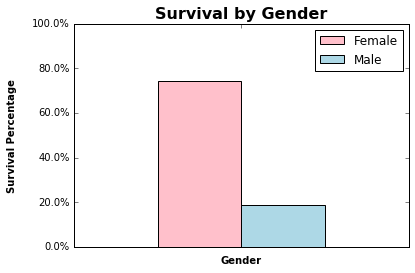

In [21]:
survived_percentage = df.groupby('Sex')['Survived'].aggregate(np.mean)
survived_percentage.reset_index()
survived_percentage = pd.DataFrame([survived_percentage.values], columns = ['Female', 'Male'])
survived_percentage.index = ['Gender']
x =survived_percentage.plot.bar(color = [ 'pink','lightblue'], use_index = False)
x.set_title('Survival by Gender', fontsize = 16, fontweight = 'bold')
x.set_ylabel('Survival Percentage', fontweight = 'bold', labelpad = 15)
x.set_xlabel("Gender", labelpad = 5, fontweight = 'bold')
plt.xticks([0], [''])
x.set_ylim(0, 1)
x.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))


Jeez, it's hard to be a guy on the Titanic.  Less than a 20% chance of survival.  It really does look like it's wome and children first.  Maybe we should take a look at class.  I would expect class to not be as strong a predictor of survival.

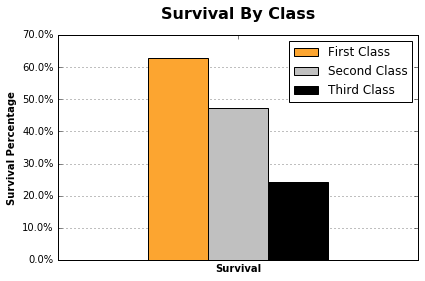

In [22]:
survival_by_class = {}
# Create dataframe for survival by class, for ease of graphing
for cls in sorted(df.Pclass.unique()):
    survival_by_class[cls] = np.sum(df.Survived[df.Pclass == cls])/(df.Pclass == cls).sum()
df_class_survival = pd.DataFrame([[survival_by_class[1], survival_by_class[2], survival_by_class[3]]], \
                                columns = ['First Class', 'Second Class', 'Third Class'])
gold = '#Fca530'
silver = "#c0c0c0"

#The graph object
graph = df_class_survival.plot.bar(color = [gold, silver, 'black'], zorder = 5)

#Title and label it all to make it pretty
plt.title("Survival By Class", fontsize = 16, fontweight = 'bold', y = 1.05)
graph.set_ylabel("Survival Percentage", fontweight = 'bold')
plt.xticks([0], ['Survival'], rotation = 0, fontweight = 'bold')
graph.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))
graph.grid(b = True, zorder = 0, axis = 'y', alpha = 1)
plt.tight_layout()
plt.show()

So, being in first class means you probably survived, but it is not as telling as if you were a woman.  The next step is of course to break this down by both gender and class.

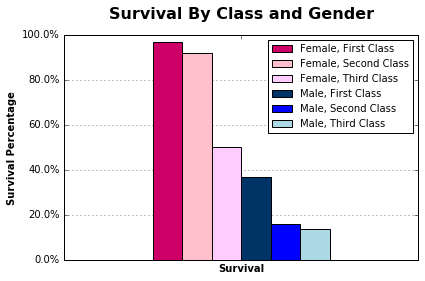

In [23]:
survival_by_class_and_gender = {}
# Create dataframe for survival by class and gender, for ease of graphing
genders = sorted(df.Sex.unique())
classes = sorted(df.Pclass.unique())
#test func for ease of writing
def test_func(gend, cl):
    return (df.Pclass == cl) & (df.Sex == gend)

for gender, cls in itertools.product(genders, classes):
    survival_by_class_and_gender[(gender,cls)] = np.sum(df.Survived[test_func(gender, cls)])/(df.PassengerId[test_func(gender, cls)]).count()
df_columns = []
class_dict = {1: 'First', 2: 'Second', 3: 'Third'}
labels = []
for g, c in itertools.product(genders, classes):
    label = "{0}, {1} Class".format(g.title(), class_dict[c])
    labels.append(label)
    df_columns.append(survival_by_class_and_gender[(g, c)])

df_class_gender_survival = pd.DataFrame([df_columns], \
                                columns = labels)


#The graph object
graph = df_class_gender_survival.plot.bar(zorder = 5, color = ['#cc0066', 'pink', '#ffccff', '#003366', 'blue', 'lightblue'])

#Title and label it all to make it pretty
plt.title("Survival By Class and Gender", fontsize = 16, fontweight = 'bold', y = 1.05)
graph.set_ylabel("Survival Percentage", fontweight = 'bold')
plt.xticks([0], ['Survival'], rotation = 0, fontweight = 'bold')
graph.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))
graph.grid(b = True, zorder = 0, axis = 'y', alpha = 1)
graph.legend(loc = 'best', fontsize = 10)
plt.tight_layout()

That looks about right.  The most interesting thing to come out of this graph is that the third class women, unfortunately, were fairly unlikely to survive.

How about distribution of age, by survival? From the below graph, it looks like a lot more people in their 30s and 40s survived, as well as young children (proportionally).  Overall the distribution looks pretty similar.

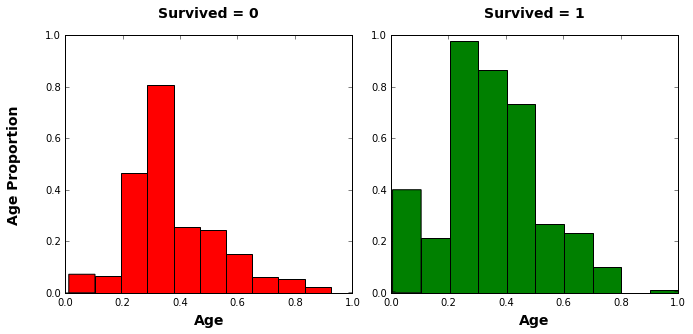

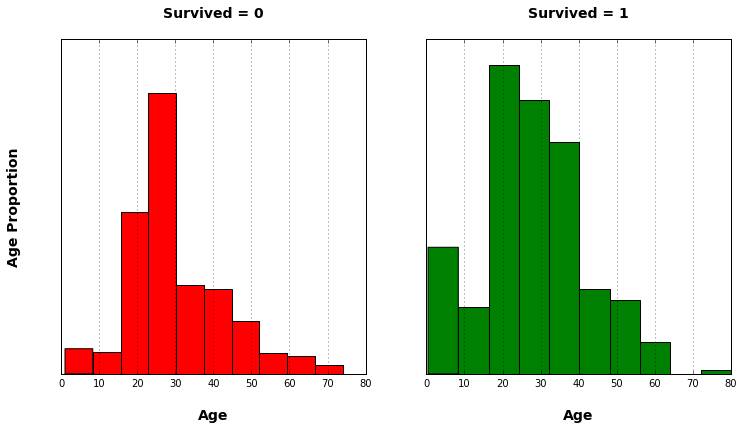

In [24]:
fig, ax = plt.subplots(1,2,  figsize = (10,5))
colors = {0 : 'red', 1: 'green'}
for survival_state in (1,0):
    ax = fig.add_subplot(1,2, survival_state + 1, frameon = False)
    dat = df.Age[df.Survived == survival_state]
    ax.hist(dat, 10, color = colors[survival_state] ) #, normed = True )
    plt.title("Survived = {0}".format(survival_state), fontweight = 'bold', fontsize = 14, y = 1.05)
    ax.set_xlabel('Age', fontweight = 'bold', fontsize = 14, labelpad = 20)
    
    plt.yticks([0.5], [''])
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    ax.set_xticklabels([0, 20, 40, 60, 80])
    
plt.tick_params(axis = 'x',  labelbottom = 'off')
plt.ylabel("Age Proportion", fontweight = 'bold', labelpad = 40,fontsize = 14)    
plt.tight_layout()

fig = plt.figure(2, figsize = (12,6))
for survival_state in (1,0):
    fig.add_subplot(1,2,survival_state + 1)
    dat = df.Age[df.Survived == survival_state]
    dat.hist(normed = True, color = colors[survival_state])
    plt.yticks([0.5], [''])
    plt.title("Survived = {0}".format(survival_state), fontweight = 'bold', fontsize = 14, y = 1.05)
    plt.xlabel('Age', fontweight = 'bold', fontsize = 14, labelpad = 20)
    if survival_state == 0:
        plt.ylabel("Age Proportion", fontweight = 'bold', labelpad = 40,fontsize = 14)    

<h3>Feature Engineering/Creation</h3>

Ok, now let's create some features using our existing dataset.  First order on the list is to convert text variables into numeric variables, so that our predictive models will be able to use the features in their algorithms.

Highlights:

<ul>
    <li>I created a <b>Gender</b> variable, which maps male to 0 and female to 1</li>
    <li>I created three dummy variables <b>Embarked_from_x</b> for x in {C,Q,S}</li>
    <li>Create dummy variable for each class: <b>FirstClass, SecondClass, ThirdClass</b></li>
    <li>Create variable <b>Family</b> for size of family: <b>SibSp + Parch</b></li>
    <li>Create multiple binary variables for gender x class x embarkation point combination</li>
</ul>

In [25]:
df['Gender'] = df.Sex.astype('category')
df.Gender = 1 - df.Gender.cat.codes

test_df['Gender'] = test_df.Sex.astype('category')
test_df.Gender = 1 - test_df.Gender.cat.codes

In [26]:
#Create dummy vars for the embarkation point
df[['Emb_from_C', 'Emb_from_Q', 'Emb_from_S']] = pd.get_dummies(df.Embarked).astype(int)
test_df[['Emb_from_C', 'Emb_from_Q', 'Emb_from_S']] = pd.get_dummies(test_df.Embarked).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Emb_from_C,Emb_from_Q,Emb_from_S
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,0,1


In [27]:
#Create dummy variables for each of the classes
df[['FirstClass', 'SecondClass', 'ThirdClass']] = pd.get_dummies(df.Pclass).astype(int)
test_df[['FirstClass', 'SecondClass', 'ThirdClass']] = pd.get_dummies(test_df.Pclass).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Emb_from_C,Emb_from_Q,Emb_from_S,FirstClass,SecondClass,ThirdClass
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,0,1,0,0,1


In [28]:
# Creation of new feature - family size
df['Family'] = df.SibSp + df.Parch
test_df['Family'] = test_df.SibSp + df.Parch

In [29]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Emb_from_C,Emb_from_Q,Emb_from_S,FirstClass,SecondClass,ThirdClass,Family
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,0,1,0,0,1,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,0,0,1,0,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0,0,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,1,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,0,1,0,0,1,0


In [31]:
#Hardcore feature generation - product of Embarked x Gender x Pclass dummy variables
embs = ('S', 'Q', 'C')
genders = (0,1)
genmap = {0: 'Male', 1: 'Female'}
classes = ('First', 'Second', 'Third')
class_labs = {'First': 1, 'Second': 2, 'Third': 3}
for e in embs:
    for g in genders:
        for c in classes:
            label = "{0}{1}Class_from_{2}".format(genmap[g], c, e)
            df[label] = ((df.Gender == g) & (df.Pclass == class_labs[c]) & (df.Embarked == e)).astype(int)
            test_df[label] = ((test_df.Gender == g) & (test_df.Pclass == class_labs[c]) & \
             (test_df.Embarked == e)).astype(int)
df[['Sex', 'Embarked', 'Pclass', 'MaleThirdClass_from_S' , 'FemaleFirstClass_from_C']].head()

# Also of Gender x Pclass
for g in genders:
    for c in classes:
         label = "{0}{1}Class".format(genmap[g], c)
         df[label] = ((df.Gender == g) & (df.Pclass == class_labs[c])).astype(int)
         test_df[label] = ((test_df.Gender == g) & (test_df.Pclass == class_labs[c])).astype(int)

<h3>Feature Dropping</h3>

Unfortunately, we can only have so many features.  Since sklearn algorithms cannot handle text data for classification deciscions, we will drop the unimportant text data, redundant data, as well as data that will not be fed into our classification algorithms.

In [32]:
#Drop useless data from the dataframes, keeping the labels and the ID data
survival_data = df.Survived
df_pass_ids = df.PassengerId
test_df['Survived'] = 0 #to make my life easier - ugly though
test_df_ids = test_df.PassengerId

cols_to_drop = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked']
df.drop( cols_to_drop,inplace = True, axis = 1)
test_df.drop(cols_to_drop,inplace = True, axis = 1)

In [34]:
# Forgot to drop sex
df.drop( 'Sex', inplace = True, axis = 1)
test_df.drop('Sex',inplace = True, axis = 1)

In [35]:
df.head()

,Fare,Gender,Emb_from_C,Emb_from_Q,Emb_from_S,FirstClass,SecondClass,ThirdClass,Family,MaleFirstClass_from_S,...,MaleThirdClass_from_C,FemaleFirstClass_from_C,FemaleSecondClass_from_C,FemaleThirdClass_from_C,MaleFirstClass,MaleSecondClass,MaleThirdClass,FemaleFirstClass,FemaleSecondClass,FemaleThirdClass
0,7.2500,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,71.2833,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,7.9250,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53.1000,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,8.0500,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


<h3>Predictive Models</h3>

Now we can get to the meat of the problem, identifying 